In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

khandyga ru
haines junction ca
qaanaaq gl
tatawin tn
dingle ie
evensk ru
llangefni gb
albany au
bay roberts ca
carutapera br
rikitea pf
gillette us
pevek ru
akdepe tm
butaritari ki
rikitea pf
bredasdorp za
kodiak us
albany au
vaini to
hermanus za
bluff nz
ponta do sol cv
east london za
cape town za
amderma ru
busselton au
ushuaia ar
snyder us
changji cn
jiaojiang cn
buraydah sa
busselton au
hofn is
phan rang vn
upernavik gl
saldanha za
punta arenas cl
severo-yeniseyskiy ru
saint-philippe re
upernavik gl
khatanga ru
shestakovo ru
busselton au
chokurdakh ru
albany au
grand gaube mu
kapaa us
busselton au
cape town za
saint-philippe re
carnarvon au
castro cl
paamiut gl
sitka us
jamestown sh
butaritari ki
sauda no
mataura pf
tuatapere nz
hermanus za
akdepe tm
thompson ca
tabialan ph
stykkisholmur is
bluff nz
chokurdakh ru
kapaa us
iquitos pe
gazanjyk tm
lasa cn
macaboboni ph
santa rosa ph
punta arenas cl
puerto leguizamo co
kang bw
hovd mn
khatanga ru
roma au
yumen cn
belmonte br
saskylakh 

butaritari ki
taltal cl
albany au
taolanaro mg
attawapiskat ca
puerto ayora ec
hermanus za
samusu ws
villany hu
avarua ck
victoria sc
bredasdorp za
henties bay na
bengkulu id
ribeira grande pt
oranjestad aw
monterey us
kavaratti in
punta arenas cl
saskylakh ru
louisbourg ca
new norfolk au
nikolskoye ru
san luis cu
vaini to
grand gaube mu
cape town za
visnes no
new norfolk au
yellowknife ca
khorinsk ru
necochea ar
vaitupu wf
henties bay na
basoko cd
tazovskiy ru
rikitea pf
atuona pf
taganak ph
puerto ayora ec
savinka ru
ushuaia ar
brae gb
ushuaia ar
tuktoyaktuk ca
arlit ne
arraial do cabo br
abu samrah qa
straumen no
talara pe
sao joao da barra br
saint anthony ca
leningradskiy ru
blacksburg us
laguna br
victoria sc
geraldton au
montepuez mz
saint-pierre pm
road town vg
castro cl
domoni km
komatipoort za
guerrero negro mx
port alfred za
bambous virieux mu
ushuaia ar
hobart au
vaini to
severo-kurilsk ru
qaanaaq gl
jamestown sh
mataura pf
kapaa us
vila velha br
mataura pf
luderitz na
tiks

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [11]:
import requests
requests.__version__

'2.22.0'

In [29]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khandyga
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | tatawin
Processing Record 5 of Set 1 | dingle
Processing Record 6 of Set 1 | evensk
Processing Record 7 of Set 1 | llangefni
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bay roberts
Processing Record 10 of Set 1 | carutapera
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | gillette
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | akdepe
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | cape town
Pro

Processing Record 43 of Set 4 | frontera
Processing Record 44 of Set 4 | katobu
Processing Record 45 of Set 4 | wick
Processing Record 46 of Set 4 | chengmai
City not found. Skipping...
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | thunder bay
Processing Record 49 of Set 4 | moshi
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | pahrump
Processing Record 3 of Set 5 | cartagena del chaira
Processing Record 4 of Set 5 | jadu
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | okhotsk
Processing Record 7 of Set 5 | rocha
Processing Record 8 of Set 5 | goderich
Processing Record 9 of Set 5 | maceio
Processing Record 10 of Set 5 | sao gabriel da cachoeira
Processing Record 11 of Set 5 | kamina
Processing Record 12 of Set 5 | northam
Processing Record 13 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 5 | noyabrsk
Processing Record 15 of Set 5 | natal


City not found. Skipping...
Processing Record 28 of Set 8 | kerrville
Processing Record 29 of Set 8 | vardo
Processing Record 30 of Set 8 | goundam
Processing Record 31 of Set 8 | sitio novo do tocantins
Processing Record 32 of Set 8 | kobojango
City not found. Skipping...
Processing Record 33 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 34 of Set 8 | saint-joseph
Processing Record 35 of Set 8 | mbour
Processing Record 36 of Set 8 | nalut
Processing Record 37 of Set 8 | obernai
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | kokopo
Processing Record 40 of Set 8 | vondrozo
Processing Record 41 of Set 8 | albina
Processing Record 42 of Set 8 | saint-georges
Processing Record 43 of Set 8 | inongo
Processing Record 44 of Set 8 | agha jari
City not found. Skipping...
Processing Record 45 of Set 8 | turtkul
City not found. Skipping...
Processing Record 46 of Set 8 | amapa
Processing Record 47 of Set 8 | kigoma
Processing Record 48 of

Processing Record 13 of Set 12 | xiamen
Processing Record 14 of Set 12 | horsham
Processing Record 15 of Set 12 | mandera
Processing Record 16 of Set 12 | poso
Processing Record 17 of Set 12 | shahrud
Processing Record 18 of Set 12 | eyl
Processing Record 19 of Set 12 | kangaatsiaq
Processing Record 20 of Set 12 | sfantu gheorghe
Processing Record 21 of Set 12 | ibra
Processing Record 22 of Set 12 | iisalmi
Processing Record 23 of Set 12 | corrales
Processing Record 24 of Set 12 | warrington
Processing Record 25 of Set 12 | neuquen
Processing Record 26 of Set 12 | battle creek
Processing Record 27 of Set 12 | krasnoarmeyskiy
Processing Record 28 of Set 12 | anse-bertrand
Processing Record 29 of Set 12 | tukrah
Processing Record 30 of Set 12 | kuty
Processing Record 31 of Set 12 | manzanillo
Processing Record 32 of Set 12 | ust-karsk
Processing Record 33 of Set 12 | havre-saint-pierre
Processing Record 34 of Set 12 | prince albert
Processing Record 35 of Set 12 | deputatskiy
Processing 

In [33]:

len(city_data)

573

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khandyga,62.6667,135.6000,-46.37,77,100,2.35,RU,2021-02-02 23:36:45
1,Haines Junction,60.7522,-137.5108,-5.80,45,73,2.30,CA,2021-02-02 23:36:45
2,Qaanaaq,77.4840,-69.3632,-12.33,84,100,0.83,GL,2021-02-02 23:35:36
3,Tatawin,32.9297,10.4518,57.20,47,1,5.75,TN,2021-02-02 23:36:45
4,Dingle,10.9995,122.6711,77.14,86,99,12.68,PH,2021-02-02 23:36:45
5,Evensk,61.9500,159.2333,12.43,91,100,15.08,RU,2021-02-02 23:36:45
6,Llangefni,53.2556,-4.3106,48.20,93,75,13.73,GB,2021-02-02 23:36:45
7,Albany,42.6001,-73.9662,27.00,87,100,9.69,US,2021-02-02 23:34:06
8,Bay Roberts,47.5999,-53.2648,28.00,80,90,10.36,CA,2021-02-02 23:36:45
9,Carutapera,-1.1950,-46.0200,78.76,81,76,7.56,BR,2021-02-02 23:36:46


In [36]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khandyga,RU,2021-02-02 23:36:45,62.6667,135.6000,-46.37,77,100,2.35
1,Haines Junction,CA,2021-02-02 23:36:45,60.7522,-137.5108,-5.80,45,73,2.30
2,Qaanaaq,GL,2021-02-02 23:35:36,77.4840,-69.3632,-12.33,84,100,0.83
3,Tatawin,TN,2021-02-02 23:36:45,32.9297,10.4518,57.20,47,1,5.75
4,Dingle,PH,2021-02-02 23:36:45,10.9995,122.6711,77.14,86,99,12.68
...,...,...,...,...,...,...,...,...,...
568,Dakar,SN,2021-02-02 23:37:01,14.6937,-17.4441,64.40,94,27,6.91
569,Anloga,GH,2021-02-02 23:37:47,5.7947,0.8973,84.20,84,20,9.22
570,Los Llanos De Aridane,ES,2021-02-02 23:37:48,28.6585,-17.9182,64.40,72,90,10.36
571,Pangody,RU,2021-02-02 23:37:48,65.8500,74.4859,5.54,95,84,6.31


In [39]:

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612310249.4887688

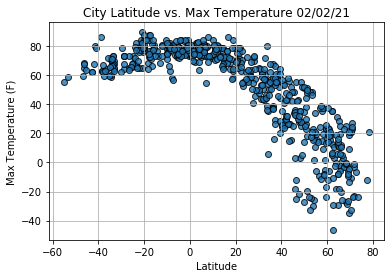

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

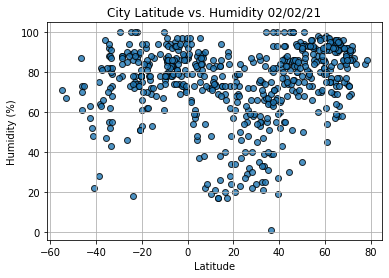

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

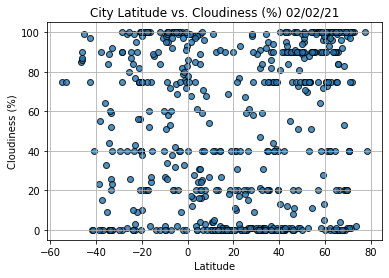

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

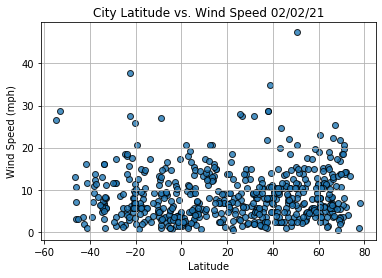

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [47]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [48]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [49]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

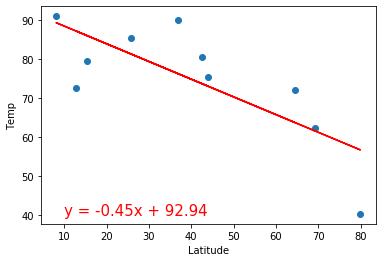

In [50]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Akdepe
Country                        TM
Date          2021-02-02 23:36:46
Lat                       42.0551
Lng                       59.3788
Max Temp                     30.2
Humidity                       74
Cloudiness                      0
Wind Speed                   9.22
Name: 13, dtype: object

In [60]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
568     True
569     True
570     True
571     True
572    False
Name: Lat, Length: 573, dtype: bool

In [61]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khandyga,RU,2021-02-02 23:36:45,62.6667,135.6000,-46.37,77,100,2.35
1,Haines Junction,CA,2021-02-02 23:36:45,60.7522,-137.5108,-5.80,45,73,2.30
2,Qaanaaq,GL,2021-02-02 23:35:36,77.4840,-69.3632,-12.33,84,100,0.83
3,Tatawin,TN,2021-02-02 23:36:45,32.9297,10.4518,57.20,47,1,5.75
4,Dingle,PH,2021-02-02 23:36:45,10.9995,122.6711,77.14,86,99,12.68


In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

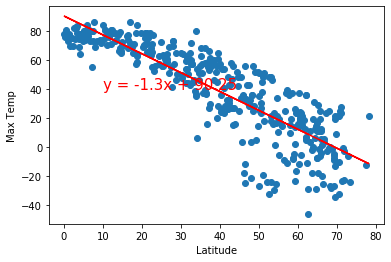

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 'Max Temp',(10,40))

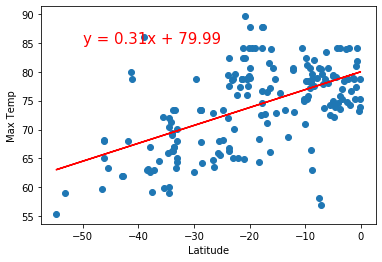

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

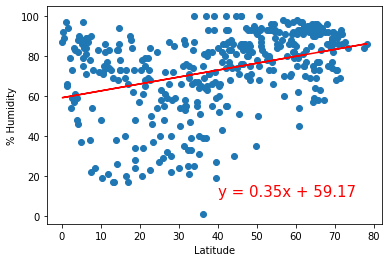

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \for % Humidity', '% Humidity',(40,10))

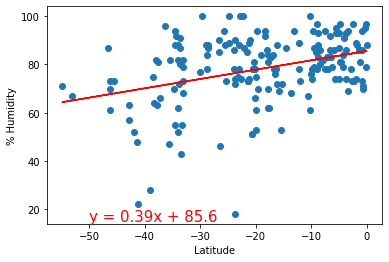

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

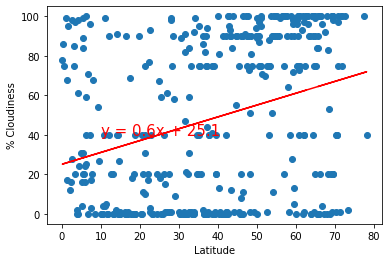

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

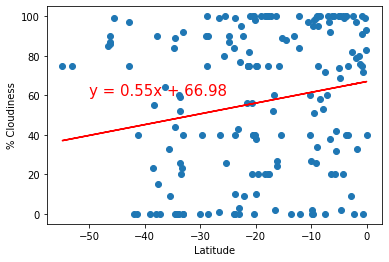

In [76]:

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

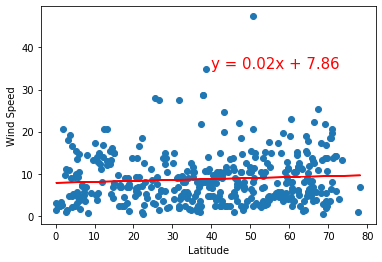

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

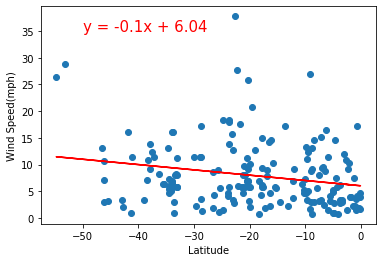

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))